In [1]:
import pandas as pd
from os import listdir
import seaborn as sns  # for nice plot styles (optional)

In [2]:
data_folder = "/Users/pgencheva/scrapped_data/"
folder = "/Users/pgencheva/Downloads/sensor_data/HACKATHON_DATA/git/air-pollution/data/"

In [3]:
output_file_sds = open(folder+'all_sds011.csv', "w")
output_file_dht = open(folder+'all_dht22.csv', "w")
output_file_ppd = open(folder+'all_ppd42ns.csv', "w")


for f in listdir(data_folder):
    if "sds011" in f:
        output_file_sds.write(open(data_folder+f).read()+"\n")
    elif "dht22" in f:
        output_file_dht.write(open(data_folder+f).read()+"\n")
    elif "ppd42ns" in f:
        output_file_ppd.write(open(data_folder+f).read()+"\n")
    else:
        print("well")

In [4]:
print(open(folder+'all_ppd42ns.csv').read()[:100])
print(open(folder+'all_dht22.csv').read()[:100])

In [5]:
df_sds0011 = pd.read_csv(folder+'all_sds011.csv', sep=';')

In [6]:
df_sds0011 = df_sds0011[df_sds0011['lat']!='lat']

In [7]:
df_sds0011.size

165980772

In [8]:
df_sds0011['lat'] = df_sds0011['lat'].astype('float')
df_sds0011['lon'] = df_sds0011['lon'].astype('float')

In [9]:
df_sds0011.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,753,SDS011,361,42.626,23.378,2017-02-23T17:50:05,49.22,NaN,NaN,34.25,NaN,NaN
1,753,SDS011,361,42.626,23.378,2017-02-23T17:51:03,44.55,NaN,NaN,33.57,NaN,NaN
2,753,SDS011,361,42.626,23.378,2017-02-23T17:52:02,42.03,NaN,NaN,30.17,NaN,NaN
3,753,SDS011,361,42.626,23.378,2017-02-23T17:53:00,44.67,NaN,NaN,29.73,NaN,NaN
4,753,SDS011,361,42.626,23.378,2017-02-23T17:53:59,56.25,NaN,NaN,32.93,NaN,NaN


In [10]:
df_sds0011['sensor_id'].nunique(), df_sds0011['sensor_id'].unique()

(192, array(['753', '787', '797', '1018', '1020', '1022', '1100', '1102',
        '1114', '1260', '1304', '1116', '1763', '1769', '1775', '1471',
        '1845', '1925', '1961', '2035', '2037', '2039', '2223', '2263',
        '2265', '2291', '2322', '2442', '3091', '3095', '3101', '3427',
        '3431', '3435', '3473', '3557', '3619', '3633', '3641', '3759',
        '3831', '3835', '3981', '4357', '4466', '4468', '4470', '4472',
        '4476', '4478', '4557', '4573', '4607', '4618', '4624', '4798',
        '4800', '5028', '5123', '4660', '5295', '5297', '5299', '5325',
        '5353', '5377', '5379', '5471', '5473', '5499', '5513', '5527',
        '4616', '5545', '5549', '5563', '5662', '5690', '5708', '5776',
        '5807', '5878', '5865', '5916', '5951', '6023', '6025', '6029',
        '6035', '6037', '6039', '6041', '6043', '6087', '6095', '6127',
        '6131', '6133', '6135', '6139', '6189', '6191', '6195', '6197',
        '6187', '6203', '6223', '6227', '6342', '6344', '6346'

In [11]:
df_sds0011['month'] = df_sds0011.apply(lambda x: x['timestamp'][:7], axis=1)

In [12]:
df_sds0011.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2,month
0,753,SDS011,361,42.626,23.378,2017-02-23T17:50:05,49.22,NaN,NaN,34.25,NaN,NaN,2017-02
1,753,SDS011,361,42.626,23.378,2017-02-23T17:51:03,44.55,NaN,NaN,33.57,NaN,NaN,2017-02
2,753,SDS011,361,42.626,23.378,2017-02-23T17:52:02,42.03,NaN,NaN,30.17,NaN,NaN,2017-02
3,753,SDS011,361,42.626,23.378,2017-02-23T17:53:00,44.67,NaN,NaN,29.73,NaN,NaN,2017-02
4,753,SDS011,361,42.626,23.378,2017-02-23T17:53:59,56.25,NaN,NaN,32.93,NaN,NaN,2017-02


# Get count of sensors per month

In [18]:
res = pd.DataFrame({'count' : df_sds0011.groupby( [ "month", "sensor_id"] ).size()}).reset_index()

In [19]:
res.head()

,month,sensor_id,count
0,2017-02,753,7675
1,2017-02,787,2983
2,2017-02,797,2879
3,2017-03,1018,30692
4,2017-03,1020,30779


In [20]:
res2 = pd.DataFrame({'count' : res.groupby(["month"]).size()}).reset_index()

In [28]:
res2.head(10) # for each month how many sensors we had

,month,count
0,2017-02,3
1,2017-03,11
2,2017-04,22
3,2017-05,31
4,2017-06,42
5,2017-07,55
6,2017-08,66
7,2017-09,85
8,2017-10,137
9,2017-11,152


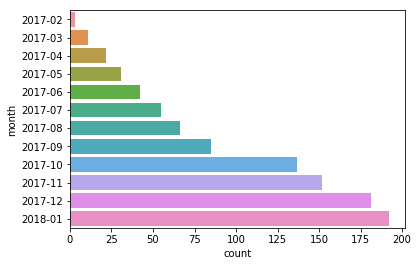

In [33]:
ax = sns.countplot(y='month', data=res)

In [39]:
df_sds0011.to_csv('airbg_pollution.csv')

# Get ids of sensors which have data for the longest period

In [38]:
df_sds0011[df_sds0011['month']=='2017-02']['sensor_id'].unique()

array(['753', '787', '797'], dtype=object)

# Plot pollution measures for these over the year

- Average over the month to show which months have more
- Average over the hour to show which hours have more

In [14]:
df_sds0011['P1'] = df_sds0011['P1'].astype('float')
df_sds0011['P2'] = df_sds0011['P2'].astype('float')

In [21]:
df_sds0011_3 = df_sds0011[df_sds0011['sensor_id'].isin(['753', '787', '797'])]

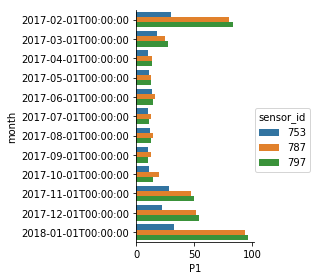

In [93]:
month_groups = df_sds0011_3.groupby(['month', 'sensor_id'])['P1'].mean().reset_index()
sns.factorplot(x="P1", y="month", hue="sensor_id", data=month_groups, kind="bar")

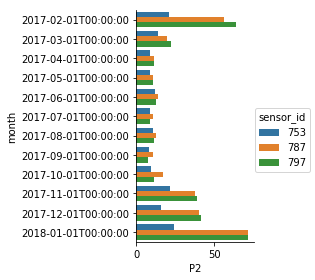

In [94]:
month_groups = df_sds0011_3.groupby(['month', 'sensor_id'])['P2'].mean().reset_index()
sns.factorplot(x="P2", y="month", hue="sensor_id", data=month_groups, kind="bar")

In [86]:
df_sds0011_3['hour'] = df_sds0011_3.apply(axis=1, func=lambda x: x['timestamp'].split('T')[-1][:2])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_sds0011_3.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2,month,month_p,units,subject,hour
0,753,SDS011,361,42.626,23.378,2017-02-23T17:50:05,49.22,NaN,NaN,34.25,NaN,NaN,2017-02-01T00:00:00,0,0,0,17
1,753,SDS011,361,42.626,23.378,2017-02-23T17:51:03,44.55,NaN,NaN,33.57,NaN,NaN,2017-02-01T00:00:00,0,0,0,17
2,753,SDS011,361,42.626,23.378,2017-02-23T17:52:02,42.03,NaN,NaN,30.17,NaN,NaN,2017-02-01T00:00:00,0,0,0,17
3,753,SDS011,361,42.626,23.378,2017-02-23T17:53:00,44.67,NaN,NaN,29.73,NaN,NaN,2017-02-01T00:00:00,0,0,0,17
4,753,SDS011,361,42.626,23.378,2017-02-23T17:53:59,56.25,NaN,NaN,32.93,NaN,NaN,2017-02-01T00:00:00,0,0,0,17


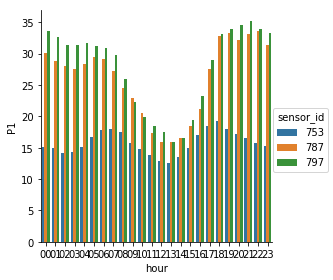

In [98]:
hour_groups = df_sds0011_3.groupby(['hour', 'sensor_id'])['P1'].mean().reset_index()
sns.factorplot(x="hour", y="P1", hue="sensor_id", data=hour_groups, kind="bar")

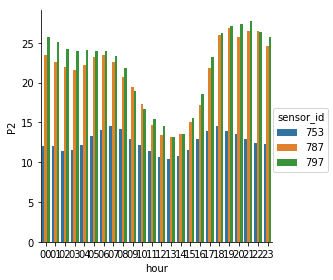

In [99]:
hour_groups = df_sds0011_3.groupby(['hour', 'sensor_id'])['P2'].mean().reset_index()
sns.factorplot(x="hour", y="P2", hue="sensor_id", data=hour_groups, kind="bar")

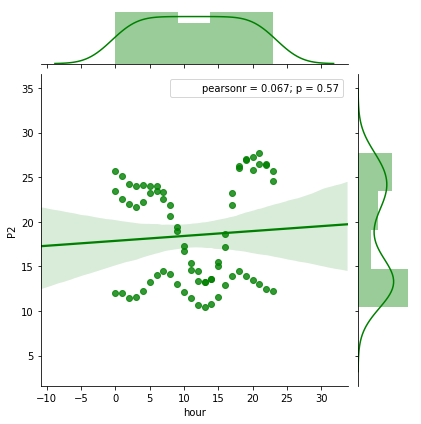

In [102]:
hour_groups['hour'] = hour_groups['hour'].astype('int')
sns.jointplot(data=hour_groups, x='hour', y='P2', kind='reg', color='g')

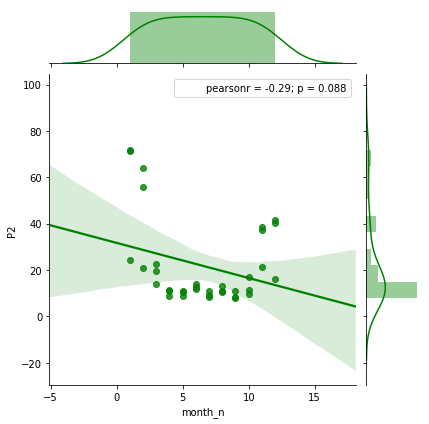

In [105]:
month_groups['month_n'] = month_groups['month'].apply(lambda x: int(x.split('-')[1]))
sns.jointplot(data=month_groups, x='month_n', y='P2', kind='reg', color='g')

In [ ]:
month_groups['month_n'] = month_groups['month'].apply(lambda x: int(x.split('-')[1]))
sns.jointplot(data=month_groups, x='month_n', y='P2', kind='reg', color='g')